In [158]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import copy
import random

In [161]:
zip_shapes = gpd.read_file("county/COUNTY_BOUNDARY.shp")

In [193]:
year = "2018"

In [194]:
def process_year(string):
    try:
        int(string)
        return int(string), int(string)
    except:
        pass
    if "-" not in string:
        return "ERROR"
    else:
        lower, upper = string.split("-")
        return int(lower), int(upper)

In [195]:
lower, upper = process_year(year)
year_list = list(range(lower, upper+1))

In [196]:
zip_data = pd.read_csv("C4K.csv")
zip_data.drop("Unnamed: 0", axis = 1, inplace = True)
old_data = zip_data[zip_data["DATE"].isin(year_list)]
old_data.drop("DATE", axis = 1, inplace = True)
old_data["ZIP CODE"] = old_data["ZIP CODE"].astype(int).astype(str)

C:\Users\kapat\AppData\Local\Temp\ipykernel_856\1196908534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_data.drop("DATE", axis = 1, inplace = True)
C:\Users\kapat\AppData\Local\Temp\ipykernel_856\1196908534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_data["ZIP CODE"] = old_data["ZIP CODE"].astype(int).astype(str)


In [197]:
zip_shapes

,COUNTY_FIP,COUNTY_NO,MAINTENANC,COUNTY_NAM,ADT_FACTOR,MAIN_DISTR,PHONE_NO_B,DESC_LOCAT,MSLINK,MAPID,LOGIN,CREATION_D,CNTY_SEAT_,MUNICIPAL_,geometry
0,35,18,8,CRAIG,1.02,2520,None,None,18.0,101431.0,upln038,1999-07-23,2520,77550.0,"POLYGON ((-95.43168 36.68443, -95.43163 36.698..."
1,45,23,6,ELLIS,1.01,2190,None,None,23.0,101436.0,upln038,1999-07-23,110,2800.0,"POLYGON ((-99.38203 36.13017, -99.38197 36.115..."
2,49,25,3,GARVIN,1.01,1875,(405) 238-2739,None,25.0,101438.0,upln038,1999-07-23,1875,57550.0,"POLYGON ((-97.20004 34.62269, -97.19981 34.622..."
3,51,26,7,GRADY,1.02,485,None,None,26.0,101439.0,upln038,1999-07-23,485,13950.0,"POLYGON ((-97.67104 35.30594, -97.67095 35.272..."
4,59,30,6,HARPER,1.01,310,None,None,30.0,101443.0,upln038,1999-07-23,310,9850.0,"POLYGON ((-100.00314 36.59328, -100.00311 36.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,119,60,4,PAYNE,1.01,615,(918) 225-3777,None,60.0,101474.0,upln038,1999-07-23,2300,70300.0,"POLYGON ((-96.78422 36.15915, -96.7663 36.1592..."
73,127,64,2,PUSHMATAHA,1.01,85,(405) 298-3371,None,64.0,101478.0,upln038,1999-07-23,85,2250.0,"POLYGON ((-95.77901 34.50665, -95.76478 34.506..."
74,135,68,1,SEQUOYAH,1.02,2120,(918) 775-4668,None,68.0,101482.0,upln038,1999-07-23,2120,65000.0,"POLYGON ((-95.12728 35.63873, -95.10966 35.638..."
75,137,69,7,STEPHENS,1.02,725,None,None,69.0,101483.0,upln038,1999-07-23,725,21900.0,"POLYGON ((-98.14211 34.50699, -98.14207 34.510..."


In [198]:
counties_map = old_data

In [199]:
def given_map3(number):
    if number == 0:
        return "0"
    elif number < 100:
        return "1"
    elif number < 500:
        return "2"
    elif number < 1000:
        return "3"
    elif number < 2500:
        return "4"
    return "5"

In [200]:
counties_map.set_index("ZIP CODE", inplace = True)

In [201]:
counties_df = pd.read_csv("counties.csv")
counties_df["ZIP CODE"] = counties_df["ZIP CODE"].astype(float)
counties_df.set_index("ZIP CODE", inplace = True)

In [202]:
counties_df

,County
ZIP CODE,
73001.0,Caddo County
73002.0,Grady County
73003.0,Oklahoma County
73004.0,Grady County
73005.0,Caddo County
...,...
74962.0,Sequoyah County
74963.0,McCurtain County
74964.0,Adair County


In [203]:
counties_map=counties_map.reset_index()

In [204]:
counties_map["ZIP CODE"]= pd.to_numeric(counties_map["ZIP CODE"], errors = "coerce")
counties_map.dropna(axis = 0, inplace=True)

In [205]:
counties_map.set_index("ZIP CODE", inplace = True)

In [206]:
counties_final = pd.merge(counties_map, counties_df, right_index=True, left_index=True)

In [207]:
counties_final.loc[73002]

Given              5.0
County    Grady County
Name: 73002.0, dtype: object

In [208]:
counties_count = counties_final.groupby(["County"])["Given"].apply(np.sum, axis = 0).reset_index()

In [209]:
def county_convert(county):
    return (county.rsplit(" ", 1)[0]).upper()

In [210]:
counties_count["County"] = (counties_count["County"]).map(county_convert)

In [211]:
counties_count["County"].values

array(['ATOKA', 'BLAINE', 'CADDO', 'CANADIAN', 'CARTER', 'CHEROKEE',
       'CHOCTAW', 'CLEVELAND', 'COMANCHE', 'CUSTER', 'DELAWARE', 'DEWEY',
       'GARFIELD', 'GARVIN', 'GRADY', 'HUGHES', 'KINGFISHER', 'LATIMER',
       'LEFLORE', 'LINCOLN', 'LOGAN', 'MCCLAIN', 'MCCURTAIN', 'MCINTOSH',
       'MUSKOGEE', 'OKLAHOMA', 'OKMULGEE', 'PAWNEE', 'PITTSBURG',
       'POTTAWATOMIE', 'SEMINOLE', 'SEQUOYAH', 'STEPHENS', 'TULSA'],
      dtype=object)

In [212]:
counties_count["Adjusted"] = counties_count["Given"].map(given_map3)

In [213]:
other_df = zip_shapes.merge(counties_count, right_on="County", left_on="COUNTY_NAM", how = "left")

In [214]:
other_df

,COUNTY_FIP,COUNTY_NO,MAINTENANC,COUNTY_NAM,ADT_FACTOR,MAIN_DISTR,PHONE_NO_B,DESC_LOCAT,MSLINK,MAPID,LOGIN,CREATION_D,CNTY_SEAT_,MUNICIPAL_,geometry,County,Given,Adjusted
0,35,18,8,CRAIG,1.02,2520,None,None,18.0,101431.0,upln038,1999-07-23,2520,77550.0,"POLYGON ((-95.43168 36.68443, -95.43163 36.698...",NaN,NaN,NaN
1,45,23,6,ELLIS,1.01,2190,None,None,23.0,101436.0,upln038,1999-07-23,110,2800.0,"POLYGON ((-99.38203 36.13017, -99.38197 36.115...",NaN,NaN,NaN
2,49,25,3,GARVIN,1.01,1875,(405) 238-2739,None,25.0,101438.0,upln038,1999-07-23,1875,57550.0,"POLYGON ((-97.20004 34.62269, -97.19981 34.622...",GARVIN,7.0,1
3,51,26,7,GRADY,1.02,485,None,None,26.0,101439.0,upln038,1999-07-23,485,13950.0,"POLYGON ((-97.67104 35.30594, -97.67095 35.272...",GRADY,108.0,2
4,59,30,6,HARPER,1.01,310,None,None,30.0,101443.0,upln038,1999-07-23,310,9850.0,"POLYGON ((-100.00314 36.59328, -100.00311 36.5...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,119,60,4,PAYNE,1.01,615,(918) 225-3777,None,60.0,101474.0,upln038,1999-07-23,2300,70300.0,"POLYGON ((-96.78422 36.15915, -96.7663 36.1592...",NaN,NaN,NaN
73,127,64,2,PUSHMATAHA,1.01,85,(405) 298-3371,None,64.0,101478.0,upln038,1999-07-23,85,2250.0,"POLYGON ((-95.77901 34.50665, -95.76478 34.506...",NaN,NaN,NaN
74,135,68,1,SEQUOYAH,1.02,2120,(918) 775-4668,None,68.0,101482.0,upln038,1999-07-23,2120,65000.0,"POLYGON ((-95.12728 35.63873, -95.10966 35.638...",SEQUOYAH,27.0,1
75,137,69,7,STEPHENS,1.02,725,None,None,69.0,101483.0,upln038,1999-07-23,725,21900.0,"POLYGON ((-98.14211 34.50699, -98.14207 34.510...",STEPHENS,70.0,1


In [215]:
other_df["Adjusted"] = other_df["Adjusted"].replace(np.nan, 0)

Text(0.5, 1.0, 'Cleats 4 Kids Donation Heatmap for 2018')

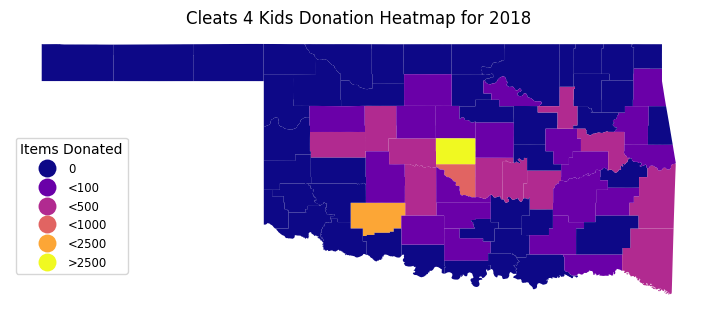

In [216]:
fig, ax = plt.subplots(figsize=(9,4))
other_df.plot(legend = True, column = "Adjusted", legend_kwds={'loc':'lower left', 
                        'bbox_to_anchor':(0, 0.1), 
                        'markerscale':1.29, 
                        'title_fontsize':'medium', 
                        'fontsize':'small'},cmap = "plasma", ax = ax)

leg1 = ax.get_legend()
leg1.set_title("Items Donated")
new_legtxt = ["0","<100","<500","<1000", "<2500", ">2500"]
for i,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[i])

plt.gca().axis('off')
plt.title(f"Cleats 4 Kids Donation Heatmap for {year}")